# Lab5

### Multivariate Regression, Non-Parametric Models and Cross-Validation

## 1. Utilize the diabetes dataset

In [131]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_X = diabetes['data']
diabetes_y = diabetes['target']

import pandas as pd
df_diabetes_X = pd.DataFrame(diabetes_X, columns = diabetes['feature_names'])
df_diabetes_y = pd.DataFrame(diabetes_y)
df_diabetes_y.columns = ['target']
df_diabetes = pd.DataFrame(diabetes_X, columns = diabetes['feature_names'])
df_diabetes['target'] = df_diabetes_y

## 2. EDA exploration

In [123]:
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


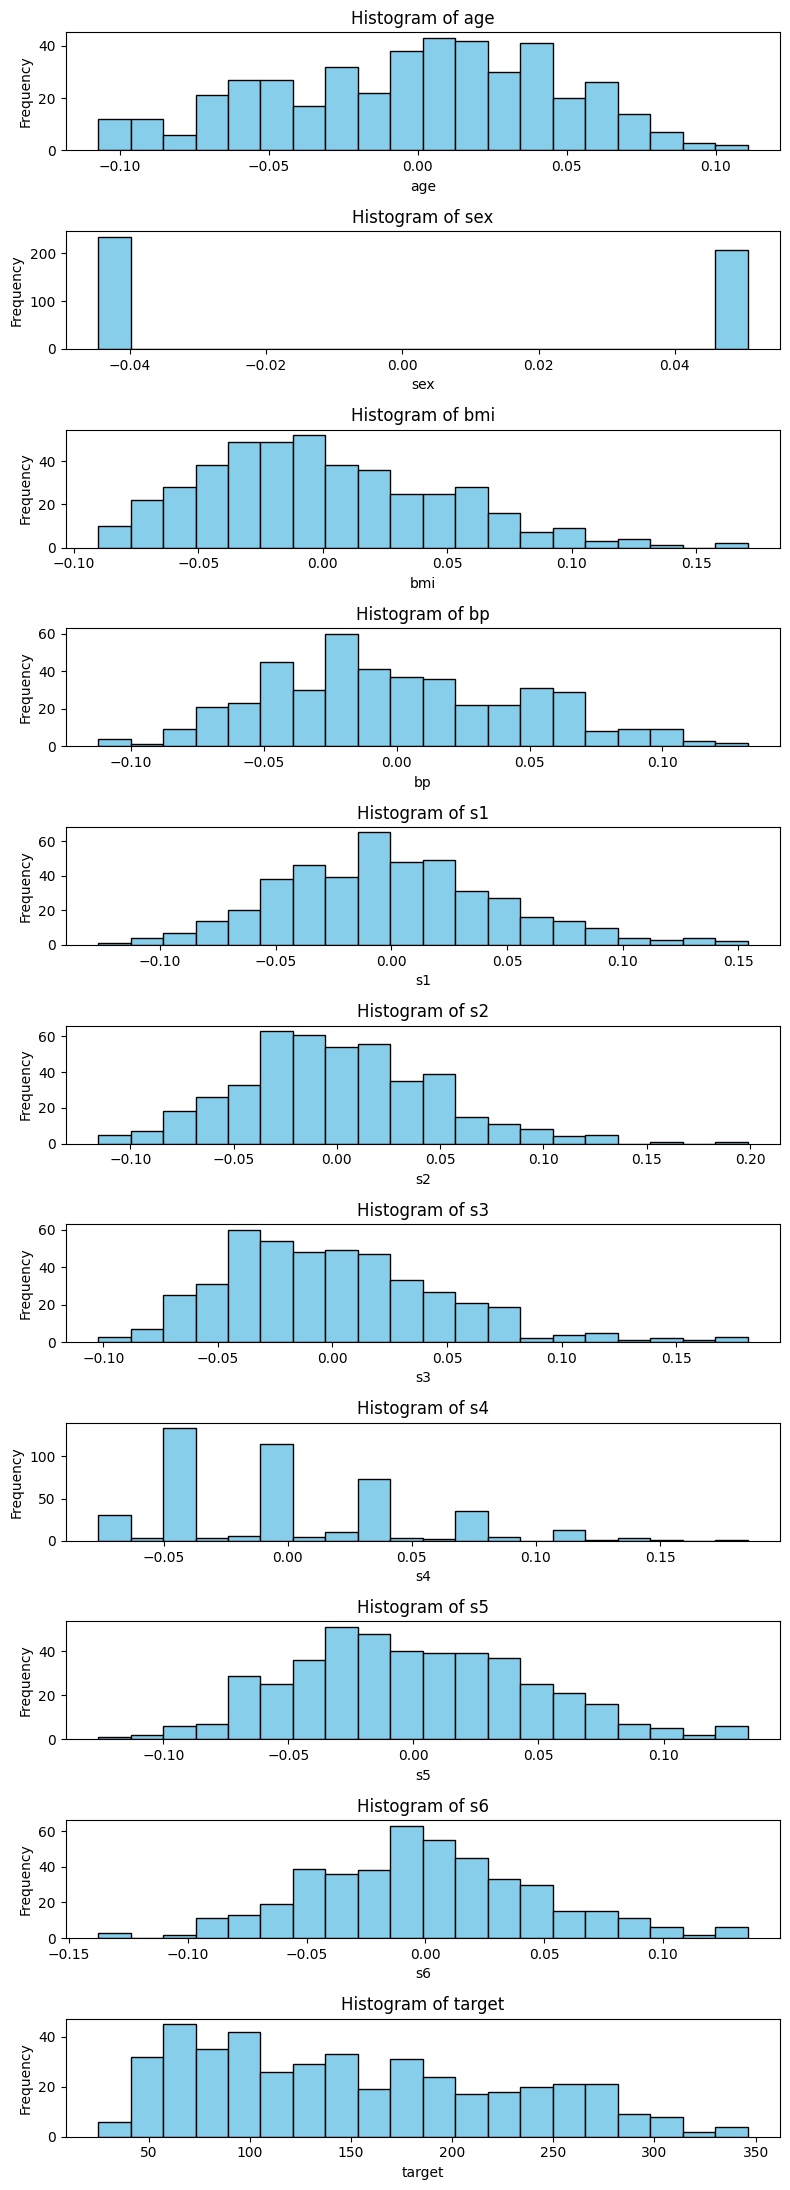

In [132]:
import matplotlib.pyplot as plt
import numpy as np

n_features = df_diabetes.shape[1]  
fig, ax = plt.subplots(n_features, 1, figsize=(8, n_features * 2)) 

for i, col in enumerate(df_diabetes.columns):
    ax[i].hist(df_diabetes[col], bins=20, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Histogram of {col}') 
    ax[i].set_xlabel(col)  
    ax[i].set_ylabel('Frequency')  

plt.tight_layout()
plt.show()

* sex feature is categorical(binary) as indicated by its histogram. 
* except s4, all features show normally distributed. 
* target variable shows slightly right-skewed distribution.

<Axes: >

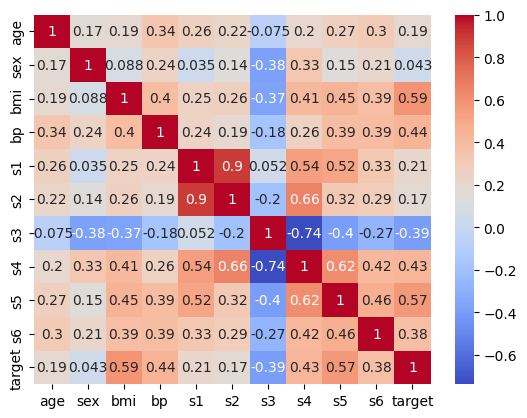

In [133]:
import seaborn as sns

corr = df_diabetes.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

* The correlation matrix shows how each variable relates to others, especially BMI and s5 have a relatively high positive correlations with the target(disease progrssion after one year), assuming that BMI and s5 can be significant predictors for diabetes progrssion.

## 3. Going forward, you can use all features in the dataset, or drop some features per your discretion based on the EDA.

* Based on EDA, I will drop all features except BMI and s5.

In [134]:
df_diabetes = df_diabetes.drop(columns=['age', 'sex','bp', 's1', 's2','s3','s4','s6'])
df_diabetes.head()

,bmi,s5,target
0,0.061696,0.019907,151.0
1,-0.051474,-0.068332,75.0
2,0.044451,0.002861,141.0
3,-0.011595,0.022688,206.0
4,-0.036385,-0.031988,135.0


## 4. Set a test-set aside

In [182]:
train_size = int(len(df_diabetes) * 0.7)
train = df_diabetes[:train_size]
test = df_diabetes[train_size:]

## 5. Perform cross-validation

### 1) At least two polynomial models (degrees >=0, of your choice)

In [193]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

X=train[['bmi', 's5']]
y=train[['target']]
model1 = Pipeline([('polynomial', PolynomialFeatures(degree=1)), 
                  ('linear', LinearRegression())])
model1.fit(X=X, y=y)

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression())])

In [194]:
model2 = Pipeline([('polynomial', PolynomialFeatures(degree=2)), 
                  ('linear', LinearRegression())])
model2.fit(X=X, y= y)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('linear', LinearRegression())])

### 2) At least two decision trees (e.g. consider changing the `max_depth` hyperparameter)

In [196]:
from sklearn import tree

tree1 = tree.DecisionTreeRegressor(max_depth=2)
tree1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [197]:
tree2 = tree.DecisionTreeRegressor(max_depth=5)
tree2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

### 3) At least two kNNs

In [198]:
from sklearn.neighbors import KNeighborsRegressor

knn1 = KNeighborsRegressor(n_neighbors=3)
knn1.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [199]:
from sklearn.neighbors import KNeighborsRegressor

knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(X, y)

KNeighborsRegressor()

### R-Squared

In [189]:
y_k = y.values.ravel()
score1 = cross_validate(model1, X, y, cv=5, scoring=['r2'])
print("polynomial1 R-Squared:", score1['test_r2'].mean(), score1['test_r2'].std())

score2 = cross_validate(model2, X, y, cv=5, scoring=['r2'])
print("polynomial2 R-Squared:",score2['test_r2'].mean(), score2['test_r2'].std())

score3 = cross_validate(tree1, X, y, cv=5, scoring=['r2'])
print("decision tree1 R-Squared:",score3['test_r2'].mean(), score3['test_r2'].std())

score4 = cross_validate(tree2, X, y, cv=5, scoring=['r2'])
print("decision tree2 R-Squared:",score4['test_r2'].mean(), score4['test_r2'].std())

score5 = cross_validate(knn1, X, y_k, cv=5, scoring=['r2'])
print("kNN1 R-Squared:",score5['test_r2'].mean(), score5['test_r2'].std())

score6 = cross_validate(knn2, X, y_k, cv=5, scoring=['r2'])
print("kNN2 R-Squared:",score6['test_r2'].mean(), score6['test_r2'].std())

polynomial1 R-Squared: 0.4392473531767453 0.09446657763318814
polynomial2 R-Squared: 0.4446371446520848 0.11131243452587897
decision tree1 R-Squared: 0.3143923840849673 0.1368026486495172
decision tree2 R-Squared: 0.23936748709105524 0.15343179384119196
kNN1 R-Squared: 0.3184217046731233 0.14009533411884392
kNN2 R-Squared: 0.3805917669555786 0.11527093773604123


### Mean Absolute Error(MAE)

In [190]:
score1 = cross_validate(model1, X, y, cv=5, scoring=['neg_mean_absolute_error'])
print("polynomial1 MAE:", -score1['test_neg_mean_absolute_error'].mean(), score1['test_neg_mean_absolute_error'].std())

score2 = cross_validate(model2, X, y, cv=5, scoring=['neg_mean_absolute_error'])
print("polynomial2 MAE:",-score2['test_neg_mean_absolute_error'].mean(), score2['test_neg_mean_absolute_error'].std())

score3 = cross_validate(tree1, X, y, cv=5, scoring=['neg_mean_absolute_error'])
print("decision tree1 MAE:",-score3['test_neg_mean_absolute_error'].mean(), score3['test_neg_mean_absolute_error'].std())

score4 = cross_validate(tree2, X, y, cv=5, scoring=['neg_mean_absolute_error'])
print("decision tree2 MAE:",-score4['test_neg_mean_absolute_error'].mean(), score4['test_neg_mean_absolute_error'].std())

score5 = cross_validate(knn1, X, y_k, cv=5, scoring=['neg_mean_absolute_error'])
print("kNN1 MAE:",-score5['test_neg_mean_absolute_error'].mean(), score5['test_neg_mean_absolute_error'].std())

score6 = cross_validate(knn2, X, y_k, cv=5, scoring=['neg_mean_absolute_error'])
print("kNN2 MAE:",-score6['test_neg_mean_absolute_error'].mean(), score6['test_neg_mean_absolute_error'].std())

polynomial1 MAE: 47.52080027782314 1.7558180194640722
polynomial2 MAE: 46.76185845471436 2.680588205751498
decision tree1 MAE: 49.671474013452844 3.5511218368500135
decision tree2 MAE: 52.14335938634317 6.089112598353761
kNN1 MAE: 50.51558258417064 6.1715893245727305
kNN2 MAE: 47.65713379164464 4.581953156220964


### MAPE

In [191]:
score1 = cross_validate(model1, X, y, cv=5, scoring=['neg_mean_absolute_percentage_error'])
print("polynomial1 MAPE:", -score1['test_neg_mean_absolute_percentage_error'].mean(), score1['test_neg_mean_absolute_percentage_error'].std())

score2 = cross_validate(model2, X, y, cv=5, scoring=['neg_mean_absolute_percentage_error'])
print("polynomial2 MAPE:", -score2['test_neg_mean_absolute_percentage_error'].mean(), score2['test_neg_mean_absolute_percentage_error'].std())

score3 = cross_validate(tree1, X, y, cv=5, scoring=['neg_mean_absolute_percentage_error'])
print("decision tree1 MAPE:", -score3['test_neg_mean_absolute_percentage_error'].mean(), score3['test_neg_mean_absolute_percentage_error'].std())

score4 = cross_validate(tree2, X, y, cv=5, scoring=['neg_mean_absolute_percentage_error'])
print("decision tree2 MAPE:", -score4['test_neg_mean_absolute_percentage_error'].mean(), score4['test_neg_mean_absolute_percentage_error'].std())

score5 = cross_validate(knn1, X, y_k, cv=5, scoring=['neg_mean_absolute_percentage_error'])
print("kNN1 MAPE:", -score5['test_neg_mean_absolute_percentage_error'].mean(), score5['test_neg_mean_absolute_percentage_error'].std())

score6 = cross_validate(knn2, X, y_k, cv=5, scoring=['neg_mean_absolute_percentage_error'])
print("kNN2 MAPE:", -score6['test_neg_mean_absolute_percentage_error'].mean(), score6['test_neg_mean_absolute_percentage_error'].std())

polynomial1 MAPE: 0.43228277009417815 0.03065159356682467
polynomial2 MAPE: 0.4230519965865339 0.03405130725230965
decision tree1 MAPE: 0.4458671512985791 0.04161655224835803
decision tree2 MAPE: 0.44379619297933004 0.03360866811532851
kNN1 MAPE: 0.43356693812677394 0.04410316558508541
kNN2 MAPE: 0.41190420280737383 0.03479736436869073


## 6. Construct a table summarizing the cross- validation results.

Use 5 folds. Each model should have a separate row in the table. Have the mean and standard deviation for each model (calculated per model over all 5 folds)

|   |R-Squared mean   |R-Squared std   |MAE mean   |MAE std   |MAPE mean   |MAPE std   |
|---|---|---|---|---|---|---|
|polynomial1   |0.4392473531767453   |0.09446657763318814   |47.52080027782314   |1.7558180194640722   |0.43228277009417815   |0.03065159356682467   |
|polynomial2   |0.4446371446520848   |0.11131243452587897   |46.76185845471436   |2.680588205751498   |0.4230519965865339   |0.03405130725230965   |
|decision tree1   |0.3143923840849673   |0.1368026486495172   |49.671474013452844   |3.5511218368500135   |0.4458671512985791   |0.04161655224835803   |
|decision tree2   |0.23742749667530036   |0.15620335444726202   |52.26863701722631   |6.2221432048780185   |0.44411184616978494   |0.03357491620762481   |
|kNN1   |0.3184217046731233   |0.14009533411884392   |50.51558258417064   |6.1715893245727305   |0.43356693812677394   |0.04410316558508541   |
|kNN2   |0.3805917669555786   |0.11527093773604123   |47.65713379164464   |4.581953156220964   |0.41190420280737383   |0.03479736436869073   |

I will choose <b>polynomial model 2 (degree 2).</b> 

* R-Squared: Polynomial model 1,2 R-squared mean is 0.439 and 0.445. It means that these models can predict well from independent variables to dependent variables. poly nomial models especially polynomial degree2 model has the best r-squared value.
* MAE: Also same as R-Squared value, polynomial models show the lowest error among those models. Additionally, knn model2 also show better MAE value than decision tree models.
* MAPE: in this case, kNN2 model shows the lowest values in MAPE. and polynomial2 model is the second. 

To sum up, polynomial regression models have high R-Squared values, and the polynomial 2 model in particular appears to provide predictions that are close to the true value, with low MAE values. This model is more accurate and consistent.
Decision tree models tend to perform worse than other models, and the performance is low. 
The kNN model shows moderate performance overall, but does not outperform in this case.

Therefore, based on the table, the polynomial2 (degree 2) model is the best model between accuracy and consistency. 

## 7. Identify the best model

### 1) Run the model on the test set and provide results (R-Squared, MAPE, MAE)

In [192]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error

X_test = test[['bmi', 's5']]
y_test = test[['target']]

print("\npolynomial model2")
print(f"R-squared: {r2_score(y_test, model2.predict(X_test))}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, model2.predict(X_test))}")
print(f"MAE: {mean_absolute_error(y_test, model2.predict(X_test))}")


polynomial model2
R-squared: 0.4040819399486394
MAPE: 0.3774806342702292
MAE: 46.33165168551575


### 2) Plot a graph with the datapoints (train+validation and test), and the fitted model

c:\Users\dut08\Documents\conestoga\foundation\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


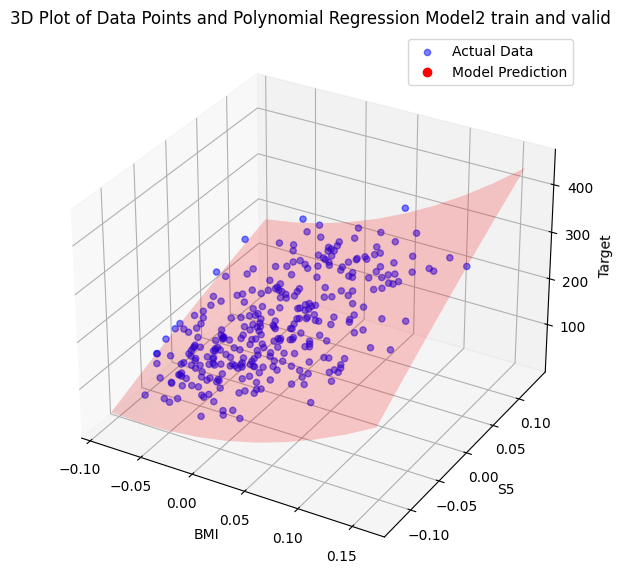

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from matplotlib.lines import Line2D

bmi = np.linspace(X[['bmi']].min(), X[['bmi']].max(), 10)
s5 = np.linspace(X[['s5']].min(), X[['s5']].max(), 10)
bmi, s5 = np.meshgrid(bmi, s5)

Z = model2.predict(np.array([bmi.ravel(), s5.ravel()]).T).reshape(bmi.shape)
# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X['bmi'], X['s5'], y['target'], color='blue', marker='o', alpha=0.5, label='Actual Data')

surf = ax.plot_surface(bmi, s5, Z, color='red', alpha=0.2, edgecolor='none')
surf_legend = Line2D([0], [0], linestyle="none", c='red', marker = 'o')

ax.set_xlabel('BMI')
ax.set_ylabel('S5')
ax.set_zlabel('Target')
plt.title('3D Plot of Data Points and Polynomial Regression Model2 train and valid')

plt.legend([scatter, surf_legend], ['Actual Data', 'Model Prediction'])
plt.show()

c:\Users\dut08\Documents\conestoga\foundation\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


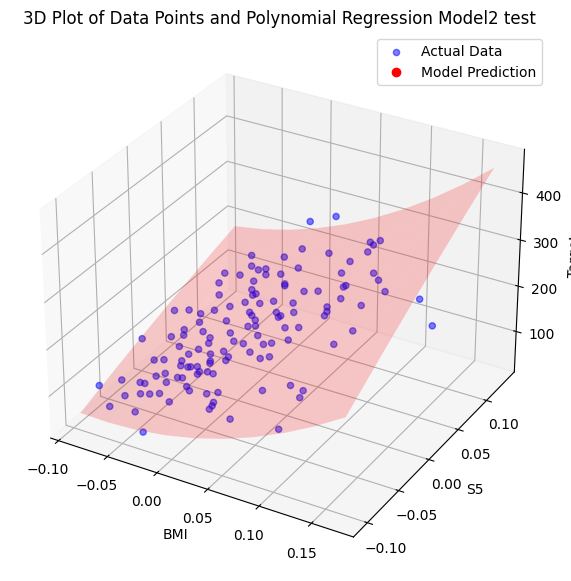

In [162]:
bmi = np.linspace(X_test[['bmi']].min(), X_test[['bmi']].max(), 10)
s5 = np.linspace(X_test[['s5']].min(), X_test[['s5']].max(), 10)
bmi, s5 = np.meshgrid(bmi, s5)

Z = model2.predict(np.array([bmi.ravel(), s5.ravel()]).T).reshape(bmi.shape)
# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_test['bmi'], X_test['s5'], y_test['target'], color='blue', marker='o', alpha=0.5, label='Actual Data')

surf = ax.plot_surface(bmi, s5, Z, color='red', alpha=0.2, edgecolor='none')
surf_legend = Line2D([0], [0], linestyle="none", c='red', marker = 'o')

ax.set_xlabel('BMI')
ax.set_ylabel('S5')
ax.set_zlabel('Target')
plt.title('3D Plot of Data Points and Polynomial Regression Model2 test')

plt.legend([scatter, surf_legend], ['Actual Data', 'Model Prediction'])
plt.show()

## 8. Provide a conclusion section.

Polynomial 2 (degree2)<br>
* Model Performance: <br>
R-squared(0.404) indicates that approximately 40.4% of the variance in the target variable can be explained by this model. While not negligible, this leaves a substantial amount of variance unexplained, suggesting there is room for improvement in the model.<br>
MAPE(0.377) indicates that the average error of the model predictions is 37.7% of the actual values. <br>
MAE(46.33) indicates the average magnitude of the errors in the model's predictions. An MAE of 46.33. <br>
Overall, this model improved compared to the previous lab model. But still can be considered high errors.
* where the model fails: <br>
according to the 3D graphs, There are some parts, particularly at the extremes of the feature values, where the model appears to underperform. This might indicate that the model's assumptions do not perform well outside the central range of the data.
* model limitations: <br>
Polynomial models can be sensitive to outliers. Outliers can significantly affect the shape of the regression curve, potentially leading to overfitting and poor generalization to unseen data. The model is likely to perform poorly when making predictions for data points that fall outside the range of the training data, which is a common issue for regression models.

In conclusion, while polynomial model2 has shown the ability to predict the target variable, its limitations suggest it may not be the best choice for scenarios requiring precise predictions. Future steps could involve exploring models that can capture more complex relationships, such as higher-degree polynomials, or non-parametric models like kNN or decision trees.